d:\python\lib\site-packages\sklearn\gaussian_process\kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


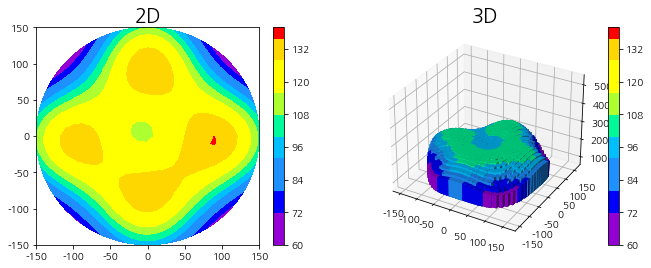

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


# train set
x = [0, -50, 0, 50, -50, 50, -50, 0, 50, -100, 0, 100, 0]
y = [0, 50, 50, 50, 0, 0, -50, -50, -50, 0, 100, 0, -100]
thk = [115, 120, 125, 125, 123, 128, 127, 128, 129, 132, 135, 135, 130]


x_train = []
for i in range(len(x)) :
    x_train.append([x[i],y[i]])
x_train = np.array(x_train)
y_train = np.array(thk)

#2D test
XY_2d = []       
for r in np.arange(0,151,10) :
    for rr in np.arange(0,r+1,10) :
        XY_2d.append([-rr,np.sqrt(r**2-rr**2)])
        XY_2d.append([rr,np.sqrt(r**2-rr**2)])
        XY_2d.append([-rr,-np.sqrt(r**2-rr**2)])
        XY_2d.append([rr,-np.sqrt(r**2-rr**2)])
        XY_2d.append([np.sqrt(r**2-rr**2),-rr])
        XY_2d.append([np.sqrt(r**2-rr**2),rr])
        XY_2d.append([-np.sqrt(r**2-rr**2),-rr])
        XY_2d.append([-np.sqrt(r**2-rr**2),rr])
x2d_test = np.array(XY_2d)

#3D test
XY_3d = []       
for r in np.arange(0,151,50) :
    for rr in np.arange(0,r+1,50) :
        XY_3d.append([-rr,np.sqrt(r**2-rr**2)])
        XY_3d.append([rr,np.sqrt(r**2-rr**2)])
        XY_3d.append([-rr,-np.sqrt(r**2-rr**2)])
        XY_3d.append([rr,-np.sqrt(r**2-rr**2)])
        XY_3d.append([np.sqrt(r**2-rr**2),-rr])
        XY_3d.append([np.sqrt(r**2-rr**2),rr])
        XY_3d.append([-np.sqrt(r**2-rr**2),-rr])
        XY_3d.append([-np.sqrt(r**2-rr**2),rr])
x3d_test = np.array(XY_3d)

# Gaussian Process
kernel = C(1.0, (1e-3, 1e3)) * RBF(10)
gp = GaussianProcessRegressor(kernel=kernel)

#model
gp.fit(x_train, y_train)
y2d_test = gp.predict(x2d_test)
y3d_test = gp.predict(x3d_test)


x2d_merge = np.concatenate((x_train, x2d_test),axis=0)
x3d_merge = np.concatenate((x_train, x3d_test),axis=0)
thk2d_merge = np.concatenate((y_train, y2d_test),axis=0)
thk3d_merge = np.concatenate((y_train, y3d_test),axis=0)

x2d = []
y2d = []
z2d = []
for i in range(len(x2d_merge)) :
    x2d.append(x2d_merge[i,0])
    y2d.append(x2d_merge[i,1])
    z2d.append(thk2d_merge[i])


x3d = []
y3d = []
z3d = []
for i in range(len(x3d_merge)) :
    x3d.append(x3d_merge[i,0])
    y3d.append(x3d_merge[i,1])
    z3d.append(thk3d_merge[i])
    
    
#color map
cmap = ListedColormap(['darkviolet', 'blue', 'dodgerblue', 'deepskyblue', 'mediumspringgreen', 
                       'greenyellow', 'yellow', 'gold', 'orange', 'red'])

b0 = np.min(z2d)*0.9
b1 = np.min(z2d) + (np.max(z2d) - np.min(z2d))/8*0.9
b2 = np.min(z2d) + (np.max(z2d) - np.min(z2d))/8*1.9
b3 = np.min(z2d) + (np.max(z2d) - np.min(z2d))/8*2.9
b4 = np.min(z2d) + (np.max(z2d) - np.min(z2d))/8*3.9
b5 = np.min(z2d) + (np.max(z2d) - np.min(z2d))/8*4.9
b6 = np.min(z2d) + (np.max(z2d) - np.min(z2d))/8*5.9
b7 = np.min(z2d) + (np.max(z2d) - np.min(z2d))/8*6.9
b8 = np.min(z2d) + (np.max(z2d) - np.min(z2d))/8*7.9
b9 = np.min(z2d) + (np.max(z2d) - np.min(z2d))/8*8.9

bounds = [b0, b1, b2, b3, b4, b5, b6, b7, b8, b9]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    
#2D plot 
fig = plt.figure(figsize=(11,4))
plt.subplots_adjust(wspace=0.2)

ax = fig.add_subplot(1,2,1)
ax = plt.tricontourf(x1,y1,z1, 20, cmap=cmap, norm=norm)
ax = plt.title('2D', fontsize=20)
ax = plt.colorbar()


#3D plot
x1 = np.array(x1)
y1 = np.array(y1)
z1 = np.array(z1)

dx = np.ones(x1.size)*12
dy = np.ones(x1.size)*12
dz = z1.flatten()

b0 = np.min(dz)*0.9
b1 = np.min(dz) + (np.max(dz) - np.min(dz))/8*0.9
b2 = np.min(dz) + (np.max(dz) - np.min(dz))/8*1.9
b3 = np.min(dz) + (np.max(dz) - np.min(dz))/8*2.9
b4 = np.min(dz) + (np.max(dz) - np.min(dz))/8*3.9
b5 = np.min(dz) + (np.max(dz) - np.min(dz))/8*4.9
b6 = np.min(dz) + (np.max(dz) - np.min(dz))/8*5.9
b7 = np.min(dz) + (np.max(dz) - np.min(dz))/8*6.9
b8 = np.min(dz) + (np.max(dz) - np.min(dz))/8*7.9
b9 = np.min(dz) + (np.max(dz) - np.min(dz))/8*8.9

bounds = [b0, b1, b2, b3, b4, b5, b6, b7, b8, b9]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


max_height = np.min(dz) + (np.max(dz) - np.min(dz))/8*9
min_height = np.min(dz)
cmap = [cmap((k-min_height)/max_height) for k in dz]

ax = fig.add_subplot(1,2,2, projection='3d')
ax.bar3d(x1, y1,z1, dx, dy, dz, color=cmap)
ax.set_zlim3d(np.min(dz), np.max(dz)*4 )
ax = plt.title('3D', fontsize=20)
ax = plt.colorbar()
plt.show()